In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv('housing.csv')

In [3]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('MEDV',axis=1), df['MEDV'], test_size=0.25, random_state=67)

In [5]:
reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_test)

print(mean_squared_error(y_test, pred, squared=True))

21.035525657539896


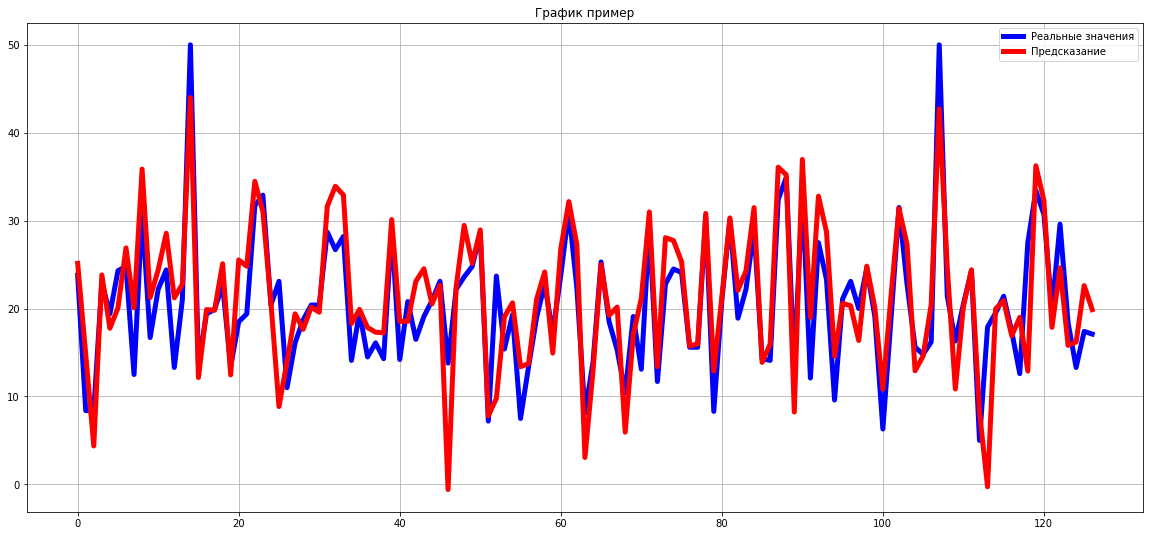

In [6]:
plt.figure(figsize=(20,9))
plt.plot(y_test.values, "blue",linewidth=5, label='Реальные значения')
plt.plot(pred, "red",linewidth=5, label='Предсказание')
plt.legend(loc='best')
plt.title("График пример")
plt.grid(True)
plt.show()

In [12]:
importance = reg.coef_
frame = { 'FeatureImportance': importance, 'Feature': X_train.columns }
result = pd.DataFrame(frame)
result.sort_values(by='FeatureImportance', ascending=False).head(10)

,FeatureImportance,Feature
5,4.599083,RM
3,2.628114,CHAS
8,0.298549,RAD
1,0.039364,ZN
2,0.013995,INDUS
11,0.011795,B
6,0.006878,AGE
9,-0.010996,TAX
0,-0.109665,CRIM
12,-0.537236,LSTAT


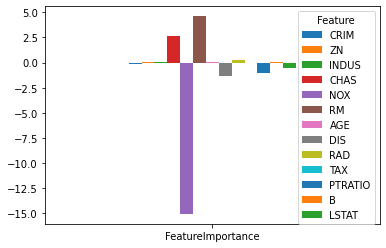

In [26]:
result_transpose = result.set_index('Feature').T
# plot feature importance
result_transpose.plot.bar(rot=0);